In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

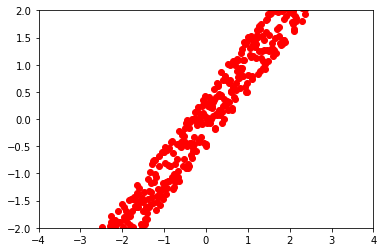

In [10]:
points = 500 #no of points
X=np.linspace(-3,3,points) #Creating random data with linear relation in between -3,3
np.random.seed(6) #setting the seed
y=X+np.random.uniform(-0.5,0.5,points) #generating the actual values which are to be used as labels in learning process
plt.axis([-4,4,-2.0,2.0])

plt.plot(X,y,'ro') #plotting the original data

In [11]:
X_o=np.c_[np.ones(len(X)),X] #appending 1s to every data point to fit a line h= c+mx
print(X_o.shape) 
W=np.random.uniform(size=X_o.shape[1]) #generating random c and m
print(W)
print(W.shape)

(500, 2)
[0.89322549 0.5842515 ]
(2,)


In [12]:
#function for predicting the values
def predict():
    return X_o.dot(W)

In [13]:
y_pred=predict()
print(y_pred.shape)
print(y_pred[:5])

#seeing what our function do

(500,)
[-0.85952901 -0.85250395 -0.84547888 -0.83845381 -0.83142874]


In [14]:
#main function for gradient descent
def GD(epochs,LR):
    total_expected_error=0
    finalepoch=0
    error_list=[]
    
    for i in range(epochs):
        global W
        
        y_pred=predict()
        error=(y_pred-y)**2
        total_error=np.sum(error)
        
        gradient=X_o.T.dot(error)/X_o.shape[0]
        if i==0:
            print(X_o.shape,error.shape,X_o.T.shape,gradient.shape,W.shape)
        
        if i%100==0:
            error_list.append(total_error)
            finalepoch+=1
        if np.abs(total_expected_error-total_error)<0.0005:
            return error_list,finalepoch
        total_expected_error=total_error
        W+=-LR*gradient 
    return error_list,finalepoch

In [15]:
total_error,finalepoch=GD(5000,0.001)

(500, 2) (500,) (2, 500) (2,) (2,)


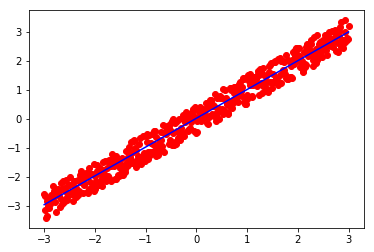

In [16]:
plt.plot(X,y,'ro')
plt.plot(X,predict(),'b')
plt.show()